Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions 
Note  
1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.

Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilities

In [2]:
import requests as req
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
resp = req.get(url)
json_data = resp.json() # Download data in the form of json

data_pokemon = json_data["pokemon"] # from attribute 'pokemon' extract information for data

df = pd.DataFrame(data_pokemon) # pandas dataframe from json format

In [4]:
df.head(10)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
6,7,007,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,8,008,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
8,9,009,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,[Water],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,00:06,None,"[Electric, Grass]",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
9,10,010,Caterpie,http://www.serebii.net/pokemongo/pokemon/010.png,[Bug],0.30 m,2.9 kg,Caterpie Candy,12.0,2 km,3.0320,303.20,16:35,[1.05],"[Fire, Flying, Rock]","[{'num': '011', 'name': 'Metapod'}, {'num': '0...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

###  Get all Pokemons whose spawn rate is less than 5%

In [6]:
threshold_spawn_rate = 0.05       # 5 % = 0.05 
pokemon_under_5 = df[df['spawn_chance'] < threshold_spawn_rate]     # the databaswe will contain all pokemon having less than threshold rate
        
print("Pokemons with spawn rate less than 5% or 0.05:")
print(pokemon_under_5[['name', 'spawn_chance']])

Pokemons with spawn rate less than 5% or 0.05:
           name  spawn_chance
1       Ivysaur        0.0420
2      Venusaur        0.0170
4    Charmeleon        0.0120
5     Charizard        0.0031
7     Wartortle        0.0340
..          ...           ...
145     Moltres        0.0000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[65 rows x 2 columns]


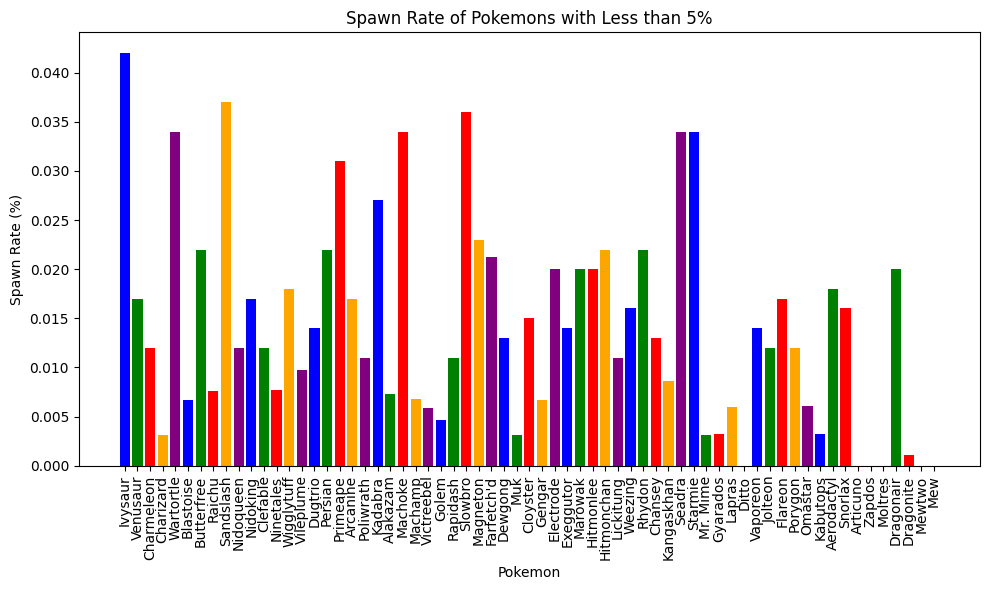

In [7]:
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(pokemon_under_5["name"], pokemon_under_5["spawn_chance"], color=colors)
plt.xlabel("Pokemon")
plt.ylabel("Spawn Rate (%)")
plt.title("Spawn Rate of Pokemons with Less than 5%")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###  Get all Pokemons that have less than 4 weaknesses

In [9]:
less_weak_pokemons = df[df['weaknesses'].apply(len) < 4]  # gives dataframe of pokemon with less than 4 weaknesses

In [10]:
less_weak_pokemons.shape  # show there are 102 pokemons out 151 having less than 4 weaknesses

(102, 17)

In [11]:
print("all Pokemons that have less than 4 weaknesses")
print(less_weak_pokemons['name'])  

all Pokemons that have less than 4 weaknesses
3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
          ...    
145       Moltres
146       Dratini
147     Dragonair
149        Mewtwo
150           Mew
Name: name, Length: 102, dtype: object


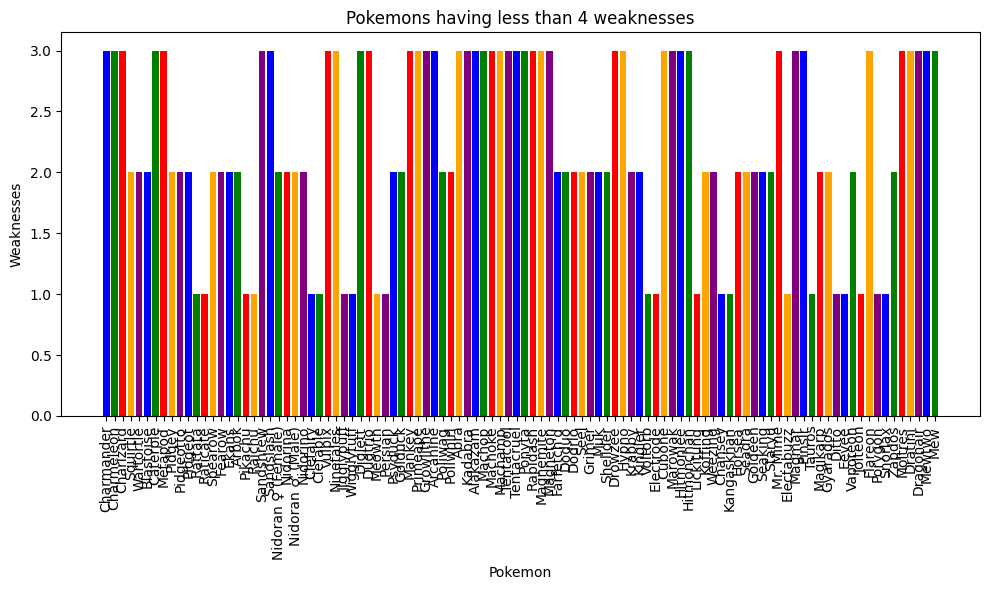

In [12]:
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.figure(figsize=(10, 6))
plt.bar(less_weak_pokemons["name"], less_weak_pokemons['weaknesses'].apply(len), color=colors)
plt.xlabel("Pokemon")
plt.ylabel("Weaknesses")
plt.title("Pokemons having less than 4 weaknesses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The below histgram will give us proper idea about weaknesses of pokemons. 

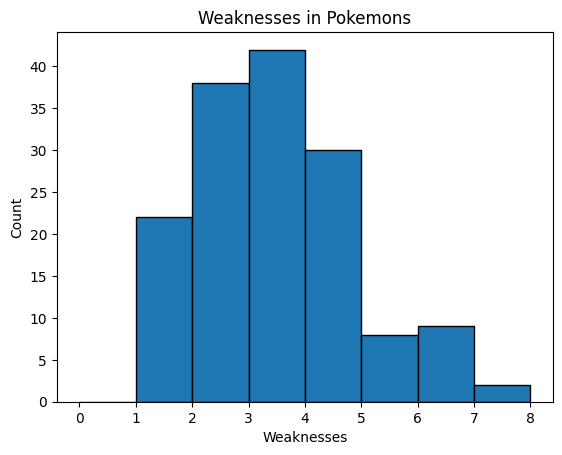

In [93]:
weakness_counts = df["weaknesses"].apply(len)
weakness_counts.plot.hist(bins=range(0, max(weakness_counts) + 2), edgecolor='black')
plt.xlabel("Weaknesses")
plt.ylabel("Count")
plt.title("Weaknesses in Pokemons")
plt.show()

- It has been observed that more then 40 pokemons have 4 weaknesses.
- It is also noticable that there are 2 pokemons having 8 weaknesses.

### Get all Pokemons that have no multipliers at all

In [94]:
df['multipliers'].isnull().sum()

81

In [96]:
no_multipliers = df[df['multipliers'].isnull()]

In [98]:
print("all Pokemons that have no multipliers")
print(no_multipliers['name']) 

all Pokemons that have no multipliers
2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object


- lets plot the pie chart to show the comparision between pokemons with and without multipliers

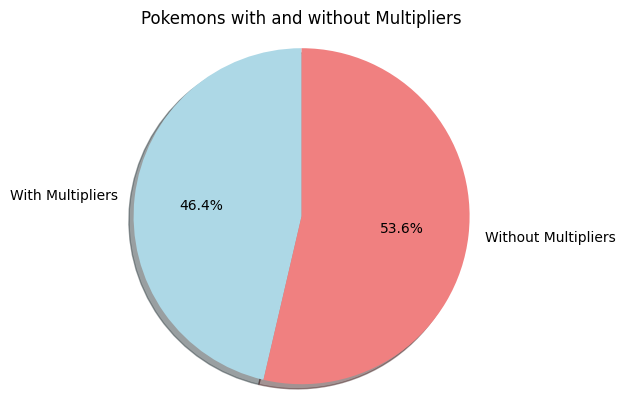

In [110]:
labels = ["With Multipliers", "Without Multipliers"]
sizes = [len(df) - len(no_multipliers), len(no_multipliers)]
colors = ["lightblue", "lightcoral"]
plt.pie(sizes,  labels=labels, colors=colors,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Pokemons with and without Multipliers")
plt.show()

### Get all Pokemons that do not have more than 2 evolutions

In [111]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [114]:
evol = [i for i in df if len(i['next_evolution']) <= 2]

TypeError: string indices must be integers

### Get all Pokemons whose spawn time is less than 300 seconds.

### Get all Pokemon who have more than two types of capabilities

In [14]:
more_than_2_types = df[df['type'].apply(len) > 2]  # gives dataframe of pokemon with more than two types of capabilities

In [15]:
more_than_2_types.shape

(0, 17)

In [16]:
Exact_2_types = df[df['type'].apply(len) > 1]  # gives dataframe of pokemon with exact 2 types of capabilities

In [17]:
Exact_2_types.shape

(62, 17)

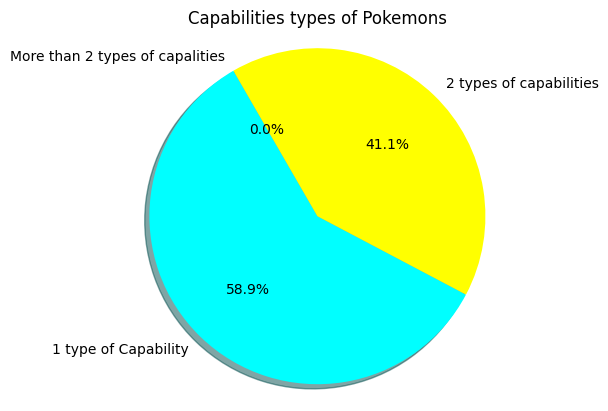

In [18]:
labels = ["1 type of Capability", "2 types of capabilities", "More than 2 types of capalities"]
sizes = [len(df) - len(Exact_2_types), len(Exact_2_types), len(more_than_2_types)]
colors = ["cyan", "yellow", "red"]
plt.pie(sizes,  labels=labels, colors=colors,  autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title("Capabilities types of Pokemons")
plt.show()